In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as sc
from matplotlib import animation
import tensorflow as tf
import pandas as pd

1.1 polynomial curve fitting with learning rate


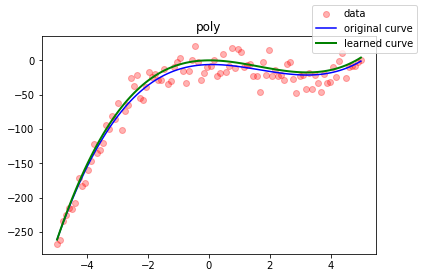

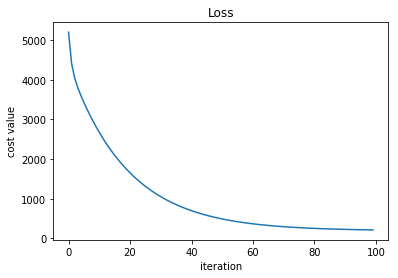

In [2]:

x=np.linspace(-5,5,100)

y=-6+x-5*x**2+x**3# Real function
Y=y+np.random.normal(0,15,100)#add noise
f=plt.figure()
fig1=plt.gca()
fig1.set_title('poly')
data=plt.scatter(x,Y,color='red',alpha=0.3)
origin,=plt.plot(x,y,color='blue')
weights=tf.Variable(tf.random_normal([4,1]),dtype=tf.float32)
xs=tf.placeholder(tf.float32)
y1=weights[0]+weights[1]*xs+weights[2]*xs**2+weights[3]*xs**3
cost=tf.reduce_sum((y1-Y)**2)/100
init=tf.global_variables_initializer()
train=tf.train.GradientDescentOptimizer(0.0001).minimize(cost)

with tf.Session() as sess:
    sess.run(init)
    acur=[]
    time=list(range(100))
    for i in time:         
        sess.run(train,feed_dict={xs:x})   
        acur=acur+[sess.run(cost,feed_dict={xs:x})]
    plt.figure()
    learned,=fig1.plot(x,sess.run(y1,feed_dict={xs:x}),linewidth=2,color='green')
    plt.plot(time,acur)
    plt.title('Loss')
    plt.xlabel('iteration')
    plt.ylabel('cost value')
     #print(sess.run(weights),sess.run(y1,feed_dict={xs:x}),sess.run(cost,feed_dict={xs:x}))
f.legend(handles=[data,origin,learned],labels=['data','original curve','learned curve'])
   

2.1.1 the beta distribution for binary distribution
goal: to show that as N goes to infinity, the variance of u goes to zero

sequential estimation:posterior =K x liklihood x prior

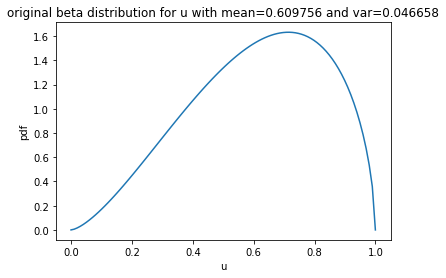

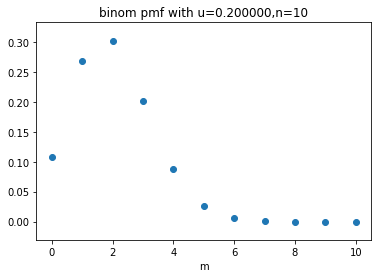

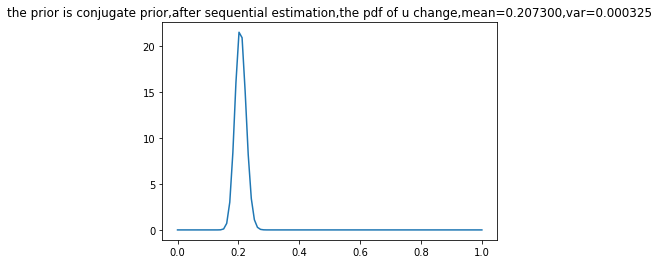

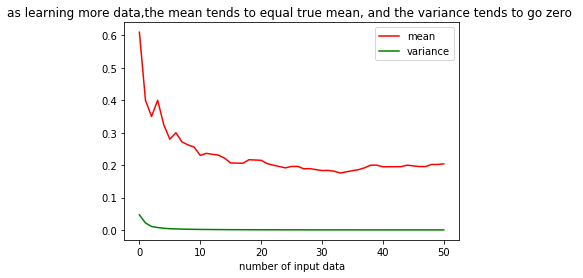

In [3]:
n,p=10,0.2
x=np.linspace(0,1,100)
s = np.random.binomial(n, p, 50)
a0,b0=2.5,1.6
y=sc.beta.pdf(x,a0,b0)
fig1=plt.figure()
plt.plot(x,y)
mean, var, skew, kurt = sc.beta.stats(a0, b0, moments='mvsk')
plt.title('original beta distribution for u with mean=%f and var=%f'%(mean,var))
plt.xlabel('u')
plt.ylabel('pdf')
fig2=plt.figure()
y1=sc.binom.pmf(list(range(n+1)),n,p)
plt.scatter(list(range(n+1)),y1)
plt.title('binom pmf with u=%f,n=%d'%(p,n))
plt.xlabel('m')
fig2=plt.figure()
a=a0+np.sum(s)
b=b0+np.sum(n-s)
y2=sc.beta.pdf(x,a,b)
plt.plot(x,y2)
mea, va, skew, kur=sc.beta.stats(a, b, moments='mvsk')
plt.title('the prior is conjugate prior,after sequential estimation,the pdf of u change,mean=%f,var=%f'%(mea,va))
fig3=plt.figure()
mean_set=[mean]
var_set=[var]
for j,i in enumerate(s):
    mean_set=mean_set+[sc.beta.stats(np.sum(s[:j])+i, (j+1)*n-np.sum(s[:j])-i, moments='mvsk')[0]]
    var_set=var_set+[sc.beta.stats(np.sum(s[:j])+i, (j+1)*n-np.sum(s[:j])-i, moments='mvsk')[1]]
m,=plt.plot(list(range(len(s)+1)),mean_set,color='red',label='mean')
v,=plt.plot(list(range(len(s)+1)),var_set,color='green',label='variance')    
plt.title('as learning more data,the mean tends to equal true mean, and the variance tends to go zero ')
plt.xlabel('number of input data')
plt.legend(handles=[m,v])

2.2.1 The Dirichlet distribution

c:\users\phantom\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
c:\users\phantom\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
c:\users\phantom\appdata\local\programs\python\python36\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


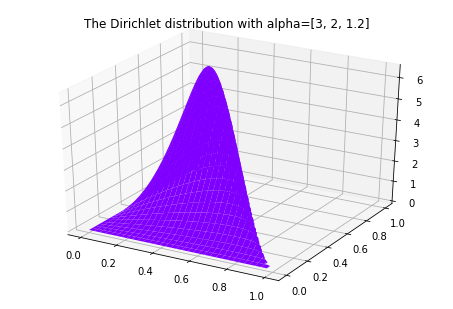

In [4]:
u1=np.linspace(0,1,100)
u2=np.linspace(0,1,100)
result=np.zeros((u1.size,u2.size))

U1,U2=np.meshgrid(u1,u2)
alpha=[3,2,1.2]
for i,x in enumerate(u1):
    for j,y in enumerate(u2):
        if (x+y>1):
            #print('jj')
            result[i][j]=np.nan
        else:
            if 1-(x+y)<0:
                print('d')
            result[i][j]=sc.dirichlet.pdf([x,y,1-(x+y)],alpha)
fig=plt.figure()
ax=Axes3D(fig)
ax.plot_surface(U1,U2,result,rstride=3,cstride=3,cmap=plt.get_cmap('rainbow'))
ax.set_title(str('The Dirichlet distribution with alpha='+str(alpha)))

plt.show()

2.3.4 Maximum Likelihood for the Gaussian using sequential estimation to estimate variance.

In [5]:
A = np.array([[3,2],[1,2]])
cov = np.dot(A,A.transpose())
mean=[2,4]

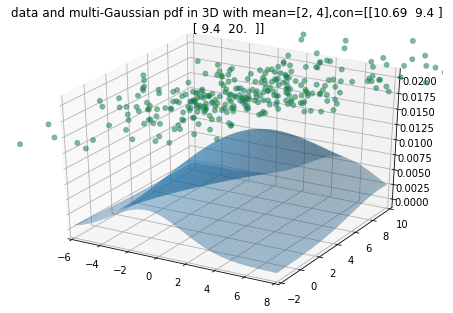

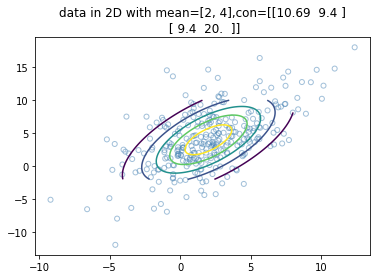

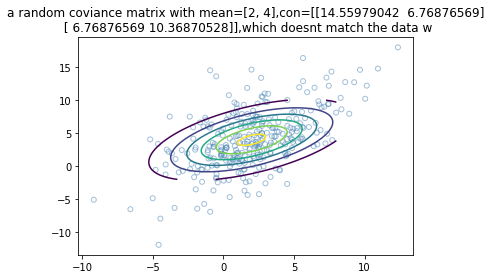

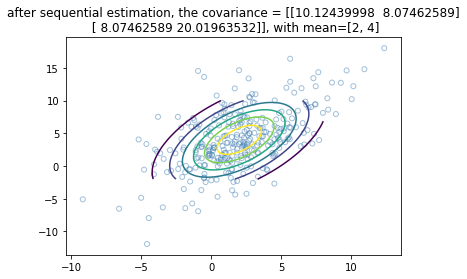

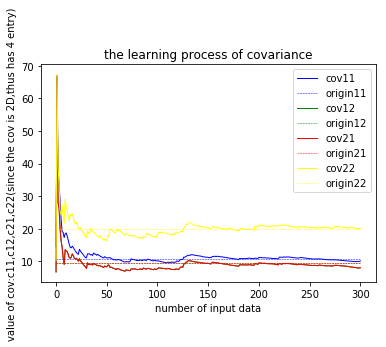

In [6]:

mean=[2,4]
A = np.array([[3,-1.3],[4,2]])
cov = np.dot(A,A.transpose())#
store=cov
x= np.random.multivariate_normal(mean, cov, 300)
x=pd.DataFrame(x)
#print(X.values)
fig=plt.figure()
ax=Axes3D(fig)
ax.set_title('data and multi-Gaussian pdf in 3D with mean=%s,con=%s'%(str(mean),str(cov)))
ax.scatter(x[0].values,x[1].values,0.02,color='green',alpha=0.5,s=25,edgecolor="steelblue")
x1=np.linspace(-6,8,100)
x2=np.linspace(-2,10,100)
result=np.zeros((100,100))
for i,e1 in enumerate(x1):
    for j,e2 in enumerate(x2):
        result[j][i]=sc.multivariate_normal.pdf([e1,e2],mean,cov)
X1,X2=np.meshgrid(x1,x2)
ax.plot_surface(X1,X2,result,alpha=0.4)
ax.set_xlim(-6,8)
ax.set_ylim(-2,10)
plt.figure()
plt.scatter(x[0].values,x[1].values,color='none',alpha=0.5,s=25,edgecolor="steelblue")
plt.contour(X1,X2,result,6)
plt.title('data in 2D with mean=%s,con=%s'%(str(mean),str(cov)))
plt.show()

#!!!!now we use sequential estimation to learn covariance matrix with known mean
mean=[2,4]
A = np.random.rand(2,2)*5
cov = np.dot(A,A.transpose())
for i,e1 in enumerate(x1):
    for j,e2 in enumerate(x2):
        result[j][i]=sc.multivariate_normal.pdf([e1,e2],mean,cov)
plt.figure()
plt.scatter(x[0].values,x[1].values,color='none',alpha=0.5,s=25,edgecolor="steelblue")
plt.contour(X1,X2,result,6)
plt.title('a random coviance matrix with mean=%s,con=%s,which doesnt match the data w'%(str(mean),str(cov)))
plt.figure()
cov_set=[cov]
for i,v in enumerate(x.values):
    t = np.expand_dims(v, axis=1)
    tm=np.expand_dims(mean, axis=1)
    cov_set=cov_set+[cov_set[i]+(np.matmul(t-tm,(t-tm).T)-cov_set[i])/(i+1.)]
    
plt.title('after sequential estimation, the covariance = %s, with mean=%s'%(str(cov_set[-1]),str(mean)))
for i,e1 in enumerate(x1):
    for j,e2 in enumerate(x2):
        result[j][i]=sc.multivariate_normal.pdf([e1,e2],mean,cov_set[-1])
plt.contour(X1,X2,result,6)    
plt.scatter(x[0].values,x[1].values,color='none',alpha=0.5,s=25,edgecolor="steelblue")

plt.figure()
plt.title('the learning process of covariance')
plt.xlabel('number of input data')
plt.ylabel(r'value of cov:c11,c12,c21,c22(since the cov is 2D,thus has 4 entry)')
ran=list(range(len(cov_set)))
cov=store
c11,=plt.plot(ran,[i[0][0 ]for i in cov_set],label='cov11',color='blue',linewidth=1)
t11,=plt.plot(ran,[cov[0][0] for i in ran],label='origin11',color='blue',linewidth=0.5,linestyle='--')
c12,=plt.plot(ran,[i[0][1 ]for i in cov_set],label='cov12',color='green',linewidth=1)
t12,=plt.plot(ran,[cov[0][1] for i in ran],label='origin12',color='green',linewidth=0.5,linestyle='--')
c21,=plt.plot(ran,[i[1][0 ]for i in cov_set],label='cov21',color='red',linewidth=1)
t21,=plt.plot(ran,[cov[1][0] for i in ran],label='origin21',color='red',linewidth=0.5,linestyle='--')
c22,=plt.plot(ran,[i[1][1 ]for i in cov_set],label='cov22',color='yellow',linewidth=1)
t22,=plt.plot(ran,[cov[1][1] for i in ran],label='origin22',color='yellow',linewidth=0.5,linestyle='--')
plt.legend(handles=[c11,t11,c12,t12,c21,t21,c22,t22])

2.3.8 Periodic VonMises Distribution

[0.7486114811608521, 0.37423598948364173, 1.3675064227084532, 2.0312057950424784, 2.0562505773311894, 2.4269418345438774, 2.842406056640535, 2.880509263165421, 3.862103793358095, 4.594059153618174, 3.669887386788492, 4.592045179824906, 3.691962809444327, 2.852806364474621, 1.894049042603568, 1.372394173765848, 2.1848481204455914, 2.853956286975972, 3.347840704264961, 4.044416737301751, 4.833691511500476, 5.244206579594558, 6.1984589139478405, 7.1560006833552166, 7.83531667790447, 7.607736000444307, 7.949228743015029, 7.357478449652355, 7.581411602661048, 8.481107106655072, 8.461125709136438, 8.385501330607168, 8.752235376121991, 9.626473619259958, 9.905017442197192, 10.649183922022168, 10.778331812658255, 11.777639774259715, 12.489473089211918, 13.339175280573706, 14.305706241012071, 14.056145275944601, 15.043771090142394, 15.528518577060611, 14.666764305292253, 15.568737074147565, 16.542085002458876, 15.586680969774717, 14.608319095762548, 15.08700783420221]
[-0.6630089367981062, -1.5

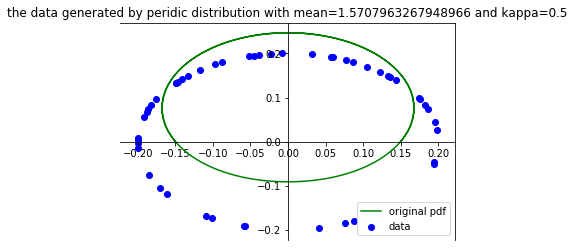

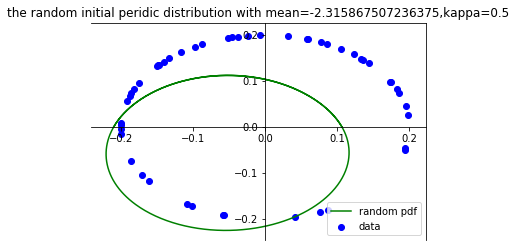

In [91]:
import math
mean=math.pi/2
m=0.5
x=np.linspace(-2*math.pi,math.pi,1000)
x0=x
plt.figure()
ax=plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ori,=plt.plot([sc.vonmises.pdf(i-mean,m)*math.cos(i) for i in x ],[sc.vonmises.pdf(i-mean,m)*math.sin(i) for i in x],color='green',label='original pdf')
x=np.random.vonmises(mean,m,50)
xr=x
gene=plt.scatter([math.cos(i)/5. for i in x ],[math.sin(i)/5. for i in x],color='blue',label='data')
ax.set_title('the data generated by peridic distribution with mean=%s and kappa=%s'%(str(mean),str(m)))
ax.legend(handles=[ori,gene,],loc='lower right')

#learn mean with known karpa
meanl=np.random.uniform(-math.pi,math.pi)
plt.figure()
ax=plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ori,=plt.plot([sc.vonmises.pdf(i-meanl,m)*math.cos(i) for i in x0 ],[sc.vonmises.pdf(i-meanl,m)*math.sin(i) for i in x0],color='green',label='random pdf')

gene=plt.scatter([math.cos(i)/5. for i in xr ],[math.sin(i)/5. for i in xr],color='blue',label='data')
ax.set_title('the random initial peridic distribution with mean=%s,kappa=%s'%(str(meanl),str(m)))
ax.legend(handles=[ori,gene,],loc='lower right')
mean_set=[meanl]
sum_sin=[]
sum_cos=[]
s=0
c=0
for i,a in enumerate(xr):
    s=s+math.sin(a)
    c=c+math.cos(a)
    sum_sin=sum_sin+[s]
    sum_cos=sum_cos+[c]
for a,b in zip(sum_cos,sum_sin):
    mean_set=mean_set+[math.atan(b/a)]
    
print(sum_sin)
print(sum_cos)
print(mean_set[-1])